In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. Lire une image A en couleur de format .JPEG ou en niveaux de gris.

In [52]:
image_path = 'cameraman.jpg'
A = cv2.imread(image_path, cv2.IMREAD_COLOR)

cv2.imshow('Image Originale', A)
cv2.waitKey(0)
cv2.destroyAllWindows()

2. Ajouter un bruit à A du type poivre et sel, puis un bruit gaussien, avec la commande imnoise.

In [53]:
def salt_pepper_noise(image, prob):
    noisy = image.copy()
    total_pixels = image.size
    num_salt = int(prob * total_pixels / 2)
    num_pepper = int(prob * total_pixels / 2)

    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy[coords[0], coords[1]] = 255

    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy[coords[0], coords[1]] = 0

    return noisy

def gaussian_noise(image, mean=0, sigma=25):
    noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

In [54]:
image_salt_pepper = salt_pepper_noise(A, 0.05)
image_gaussian = gaussian_noise(A, 0.25, 1)  

cv2.imshow('Image avec bruit salt&pepper', image_salt_pepper)  
cv2.imshow('Image avec bruit guassian', image_gaussian)
cv2.waitKey(0)
cv2.destroyAllWindows()


3. Filtrer ces deux images bruitées en utilisant les filtres vus en cours (filtre passe bas, médian ).

In [55]:
def filtre_passbas(image, tailleNoyau=5):
    noyau = np.ones((tailleNoyau, tailleNoyau), np.float32) / (tailleNoyau * tailleNoyau)
    return cv2.filter2D(image, -1, noyau)

def filtre_median(image, tailleNoyau=5):
    return cv2.medianBlur(image, tailleNoyau)

In [56]:
image_salt_pepper_fpb = filtre_passbas(image_salt_pepper)
image_gaussian_fpb = filtre_passbas(image_gaussian)

image_salt_pepper_median = filtre_median(image_salt_pepper)
image_gaussian_median = filtre_median(image_gaussian)

cv2.imshow('Salt & Pepper - Low Pass Filter', image_salt_pepper_fpb)
cv2.imshow('Gaussian - Low Pass Filter', image_gaussian_fpb)
cv2.imshow('Salt & Pepper - Median Filter', image_salt_pepper_median)
cv2.imshow('Gaussian - Median Filter', image_gaussian_median)
cv2.waitKey(0)
cv2.destroyAllWindows()

4. Appliquer à A un filtre passe- haut avec et sans la moyenne. Afficher le résultat. Conclusions.

In [8]:
def high_pass_filter(image, mean=False):
    noyau = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])
    if mean:
        noyau = noyau / 9
    return cv2.filter2D(image, -1, noyau)

In [57]:
cv2.imshow('Image Original', A)
cv2.imshow('Pass Haut sans moyenne', high_pass_filter(A))
cv2.imshow('Pass Haut avec moyenne', high_pass_filter(A,1))

cv2.waitKey(0)
cv2.destroyAllWindows()

5. Appliquer à A le filtre accentuateur.

In [ ]:
def sharpening_filter(image):
    kernel = np.array([[0, -1,  0],
                       [-1, 5, -1],
                       [0, -1,  0]])
    return cv2.filter2D(image, -1, kernel)

In [58]:
cv2.imshow('Original image',A)
cv2.imshow('Sharpened Image', sharpening_filter(A))
cv2.waitKey(0)
cv2.destroyAllWindows()

6. Trouver la TF de l’image cameraman . Afficher l’image module et celle de l’argument.

In [62]:
# Function to compute Fourier Transform and display magnitude & phase
def fourier_transform(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude = np.abs(fshift)
    phase = np.angle(fshift)
    
    return magnitude, phase

In [46]:
def fix_mag(magnitude):
    magnitude_display = np.log(1 + magnitude)
    magnitude_display = cv2.normalize(magnitude_display, None, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(magnitude_display)

def fix_phase(phase):
    phase_display = cv2.normalize(phase, None, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(phase_display)

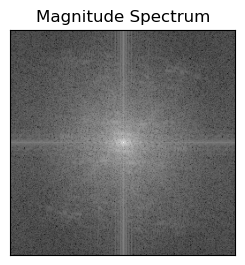

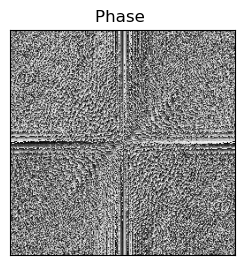

In [50]:
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
magnitude, phase = fourier_transform(img)


plt.subplot(122),plt.imshow(magnitude, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(122),plt.imshow(phase, cmap = 'gray')
plt.title('Phase '), plt.xticks([]), plt.yticks([])
plt.show()

7. Trouver la TF de l’image trui . Afficher l’image module et celle de l’argument.

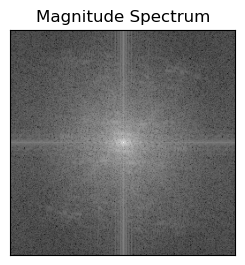

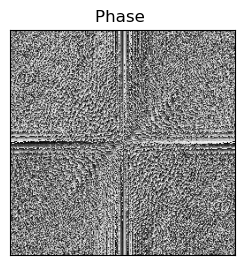

In [ ]:
image_path = 'trui.png'

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
magnitude, phase = fourier_transform(img)


plt.subplot(122),plt.imshow(magnitude, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(122),plt.imshow(phase, cmap = 'gray')
plt.title('Phase '), plt.xticks([]), plt.yticks([])
plt.show()

8. Construire une 3ème image dont le module de sa TF est égal à celui de cameraman et son
argument est celui de l&#39;image trui. Conclusion.

In [ ]:
def reconstruct_image(magnitude, phase):
    f_new = magnitude * np.exp(1j * phase)
    img_reconstructed = np.abs(np.fft.ifft2(np.fft.ifftshift(f_new)))
    return np.uint8(img_reconstructed)

In [64]:

T = cv2.imread('trui.png', cv2.IMREAD_COLOR)
magnitude_A, phase_A = fourier_transform(A)
magnitude_T, phase_T = fourier_transform(T)

nouvelle_image = reconstruct_image(magnitude_A, phase_T)

# 2. Afficher l'image
cv2.imshow('Cameraman', A)
cv2.imshow('Trui', T)
cv2.imshow('Nouvelle image', nouvelle_image)
cv2.waitKey(0)
cv2.destroyAllWindows()